## Desenvolvendo um circuito para violar a Desigualdade de Bell

1. Preparar um estado maximamente emaranhado
$$
\begin{cases} 
\ket{\Phi^{+}} = \frac{1}{\sqrt{2}} (\ket{00}+\ket{11}) \\
\ket{\Phi^{-}} = \frac{1}{\sqrt{2}} (\ket{00}-\ket{11}) \\
\ket{\Psi^{+}} = \frac{1}{\sqrt{2}} (\ket{01}+\ket{10}) \\
\ket{\Psi^{-}} = \frac{1}{\sqrt{2}} (\ket{01}-\ket{10})
\end{cases} 
$$
2. Escolhemos o estado $\ket{\Psi^{-}}$
3. Realizar medições nos qubits em bases escolhidas para maximizar a violação da desigualdade de Bell

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from qiskit import *
from qiskit.circuit.library import RYGate
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.primitives import BackendSamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.visualization import plot_histogram


## Mapeamento:
#### 1. Estado Inicial:

$$
\ket{\psi_0} = \ket{0} \otimes \ket{0}
$$

#### 2. Criação do circuito com qubtis emaranhados utilizando a porta Hadamard e CNOT
1. Porta Hadamard:
$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

2. Porta CNOT:Porta de dois qubits onde o qubit alvo é invertido se o controle for $\ket{1}$
$$
\text{CNOT} \ket{a, b} \rightarrow \ket{a, b \oplus a}
$$

3. Assim , aplicando Hadamard e CNOT
$$
|0\rangle \otimes |0\rangle \xrightarrow{H \otimes I} \left( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \right) \otimes |0\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)
$$


$$
\frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) \xrightarrow{\text{CNOT}} \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
$$

4. Assim, temos o Estado maximamente emaranhado:
$$
\ket{\Phi^{+}} = \frac{1}{\sqrt{2}} (\ket{00}+\ket{11})
$$


#### Aplicar a porta x e z no qubit 2 para chegar ao estado $\ket{\Psi^{-}}$

1. Seja as portas X(Inverte o estado do qubit):
$$
X =
\begin{bmatrix}
0 & 1 \\
1 & 0 
\end{bmatrix}
$$

E Z( Aplica uma inversão de fase no estado $\ket{1}$):
$$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$



2. Aplicar X e Z no estado 
$$
\begin{align*}
(Z \otimes I)(X \otimes I) \ket{\psi} 
&= (Z \otimes I)(X \otimes I) \left( \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}) \right) \\
&= (Z \otimes I) \left( \frac{1}{\sqrt{2}} (X\ket{0} \otimes \ket{0} + X\ket{1} \otimes \ket{1}) \right) \\
&= (Z \otimes I) \left( \frac{1}{\sqrt{2}} (\ket{1}\ket{0} + \ket{0}\ket{1}) \right) \\
&= \frac{1}{\sqrt{2}} (Z\ket{1} \otimes \ket{0} + Z\ket{0} \otimes \ket{1}) \\
&= \frac{1}{\sqrt{2}} ((-\ket{1})\ket{0} + \ket{0}\ket{1}) \\
&= \frac{1}{\sqrt{2}} (\ket{0}\ket{1} - \ket{1}\ket{0}) \\
&= \ket{\Psi^-}
\end{align*}
$$

- Para violar CHSH, as medições devem ser feitas em bases rotacionadas. Afim de atingir a violação a partir da rotação das bases é aplicado duas porta $Ry(\theta)$ em cada qubit.
$$
R_y(\theta) = 
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) 
\end{bmatrix}
$$

- Utilizamos um função que recebe dois parâmetros: theta_a(Ângulo de medição de Alice) e theta_b(Ângulo de medição de Bob) para criação de um circuito. Esse ângulos contribuiem para determinação das bases para qubit que será medido 


In [3]:
#Função do estado de bell com parametros theta_a e theta_b
def bell_circuit(theta_a, theta_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.x(1)
    qc.z(0)

    qc.barrier()

    #Rotação de um qubit em torno do eixo Y.
    qc.ry(-theta_a, 0) #Rotação de Alice
    qc.ry(-theta_b, 1) #Rotação de Bob
    
    qc.measure_all()
    return qc

# Circuito sem rotação
theta_a = 0
theta_b = 0

circuito = bell_circuit(theta_a, theta_b)
circuito.draw()

┌───┐     ┌───┐ ░ ┌───────┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ Z ├─░─┤ Ry(0) ├─░─┤M├───
        └───┘┌─┴─┐├───┤ ░ ├───────┤ ░ └╥┘┌─┐
   q_1: ─────┤ X ├┤ X ├─░─┤ Ry(0) ├─░──╫─┤M├
             └───┘└───┘ ░ └───────┘ ░  ║ └╥┘
   c: 2/═══════════════════════════════╬══╬═
                                       ║  ║ 
meas: 2/═══════════════════════════════╩══╩═
                                       0  1

In [12]:
latex = circuito.remove_final_measurements(inplace=False)
psi = Statevector.from_instruction(latex)
psi.draw(output='latex') 


<IPython.core.display.Latex object>

## Criação do Backend e Transpilação 
1. Criar um Backend(Simulador Ideal)
2. Executar circuitos de Bell com diferentes configurações de ângulos e armazenar os resultados das medições.

In [19]:
backend= AerSimulator()

# Criação do dicionário com ângulos de rotação 
angles = {
    'A0B0': (0,np.pi/4),
    'A0B1': (0,-np.pi/4),
    'A1B0': (np.pi/2,np.pi/4),
    'A1B1': (np.pi/2,-np.pi/4)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=100000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

In [ ]:
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography


qstexp1 = StateTomography(circuito)
qstdata1 = qstexp1.run(backend, seed_simulation=1000).block_for_results()

# Print results
display(qstdata1.analysis_results(dataframe=True))


ModuleNotFoundError: No module named 'qiskit_experiments'

## Plotar os histogramas das medições

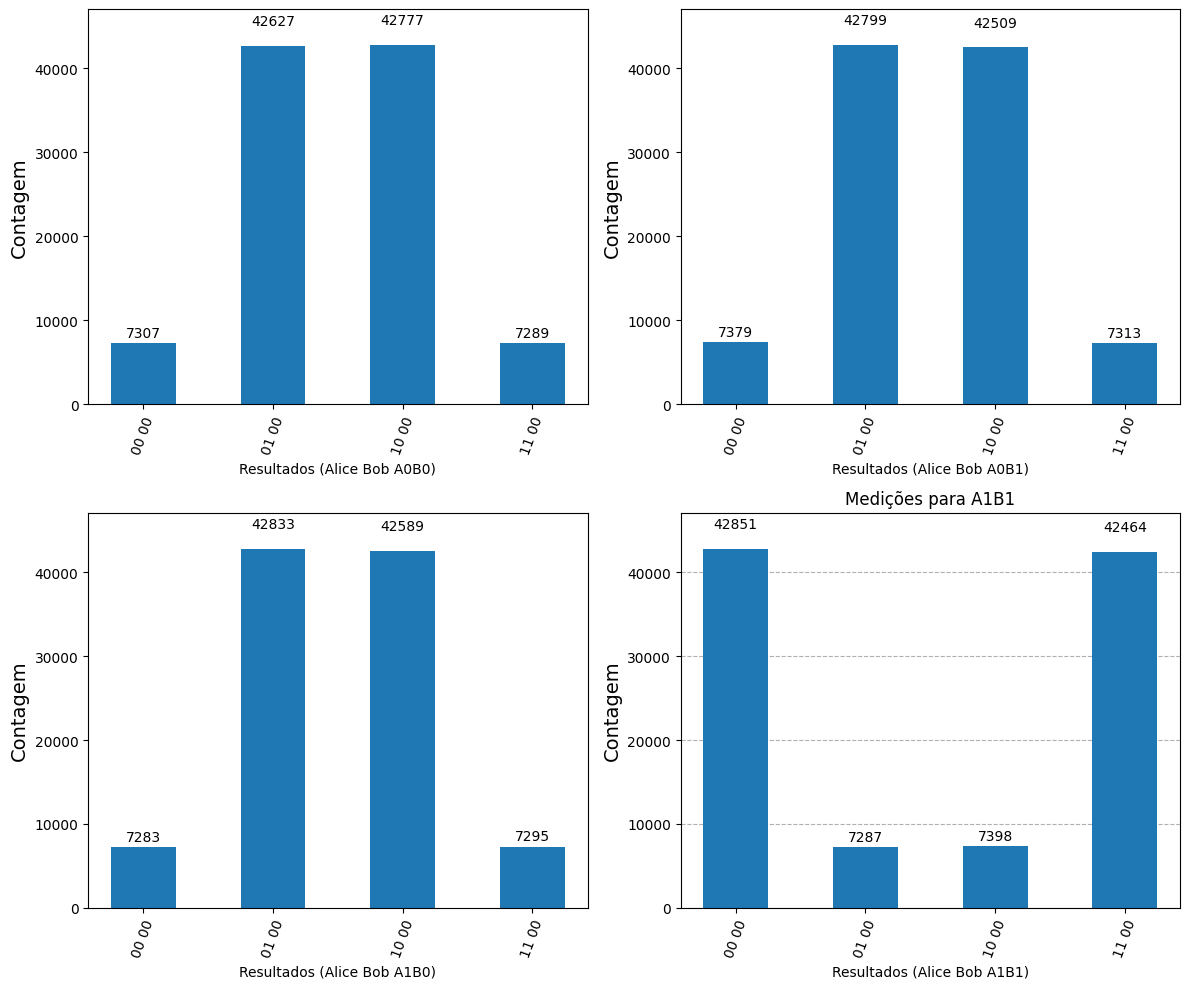

In [23]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# Criar uma figura com 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Converter os eixos para uma lista simples para facilitar o loop
axs = axs.ravel()

# Para cada configuração de ângulo, gerar o histograma correspondente
for idx, (label, counts) in enumerate(results_sem_ruido.items()):
    plot_histogram(counts, ax=axs[idx], title=f'Medições para {label}')
    axs[idx].set_xlabel(f'Resultados (Alice Bob {label})')
    axs[idx].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


## Intepretação dos Gráficos
- Anticorrelação: Quando Alice mede o qubit dela e obtém 0, Bob sempre obtém 1
- Correlação: Se Alice mede e obtém 0, Bob também obtém 0

| Gráfico | Configuração | Dominância | Correlação esperada | 
| ------- | ------------ | ---------- | ------------------- |
| 1º      | A0B0         | `01`/`10`  | Anticorrelação      |
| 2º      | A0B1         | `01`/`10`  | Anticorrelação      |
| 3º      | A1B0         | `01`/`10`  | Anticorrelação      |
| 4º      | A1B1         | `00`/`11`  | Correlação          |


---

## Calcular o valor esperado

$$
E = \sum_{a,b} v(a,b) \cdot P(a,b)
\quad \text{onde} \quad
v(a,b) = 
\begin{cases}
+1 & \text{se } a = b \\
-1 & \text{se } a \neq b
\end{cases}
$$

In [21]:
# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e


## Cálculo do parâmetro CHSH
$$
S =E(A_0,B_0)+E(A_0,B_1)+E(A_1,B_0)-E(E_1,B_1)
$$
- Se 
$∣S∣>2$, há violação da desigualdade clássica, provando não-localidade quântica.

In [22]:
E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S = abs(S)
print(f"S = {S:.3f}")

S = 2.829


---

## Códigos dos ângulos:

In [24]:
angles = {
    'A0B0': (0,np.pi/2),
    'A0B1': (0,-np.pi/2),
    'A1B0': (np.pi/2,np.pi/2),
    'A1B1': (np.pi/2,-np.pi/2)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S1 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/3),
    'A0B1': (0,-np.pi/3),
    'A1B0': (np.pi/2,np.pi/3),
    'A1B1': (np.pi/2,-np.pi/3)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S2 = abs(S)


###

angles = {
    'A0B0': (0,np.pi/4),
    'A0B1': (0,-np.pi/4),
    'A1B0': (np.pi/2,np.pi/4),
    'A1B1': (np.pi/2,-np.pi/4)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S3 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/5),
    'A0B1': (0,-np.pi/5),
    'A1B0': (np.pi/2,np.pi/5),
    'A1B1': (np.pi/2,-np.pi/5)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S4 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/6),
    'A0B1': (0,-np.pi/6),
    'A1B0': (np.pi/2,np.pi/6),
    'A1B1': (np.pi/2,-np.pi/6)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S5 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/7),
    'A0B1': (0,-np.pi/7),
    'A1B0': (np.pi/2,np.pi/7),
    'A1B1': (np.pi/2,-np.pi/7)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S6 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/8),
    'A0B1': (0,-np.pi/8),
    'A1B0': (np.pi/2,np.pi/8),
    'A1B1': (np.pi/2,-np.pi/8)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S7 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/9),
    'A0B1': (0,-np.pi/9),
    'A1B0': (np.pi/2,np.pi/9),
    'A1B1': (np.pi/2,-np.pi/9)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S8 = abs(S)

###

angles = {
    'A0B0': (0,np.pi/10),
    'A0B1': (0,-np.pi/10),
    'A1B0': (np.pi/2,np.pi/10),
    'A1B1': (np.pi/2,-np.pi/10)
}

# Executar os circuitos
results_sem_ruido = {} #Inicializa dicionário vazio para armazenar as contagens de cada configuração.
for label, (theta_a, theta_b) in angles.items(): #Itera sobre cada par label e tuplas de ângulos
    qc = bell_circuit(theta_a, theta_b) #Retorna o circuito quântico específico daquela configuração.
    tqc = transpile(qc, backend) #adapta o circuito para o backend (aqui, o simulador).
    job = backend.run(tqc, shots=1000) #Executa o circuito transpilado no simulador.
    counts = job.result().get_counts()
    results_sem_ruido[label] = counts #Armazena os resultados no dicionário results, com a chave sendo o rótulo da configuração

# Contrução de uma função que recebe o dicionário counts ,e retorna o valor de E
def expectation(counts):
    total = sum(counts.values()) #soma de todas as contagens 
    e = 0 #Inicializa variável acumuladora de expectativa.
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  #
        value = 1 if a == b else -1 #Aplicação de v(a,b)
        e += value * count / total
    return e

E = {label: expectation(c) for label, c in results_sem_ruido.items()} #Expectativas calculadas

S = E['A0B0'] + E['A0B1'] + E['A1B0'] - E['A1B1'] #Combina as 4 expectativas conforme a fórmula CHSH 
S9= abs(S)

Valores_S = np.array([[S1,S2,S3],[S4,S5,S6],[S7,S8,S9]])
print(Valores_S)

[[2.038 2.778 2.76 ]
 [2.822 2.718 2.57 ]
 [2.616 2.636 2.554]]


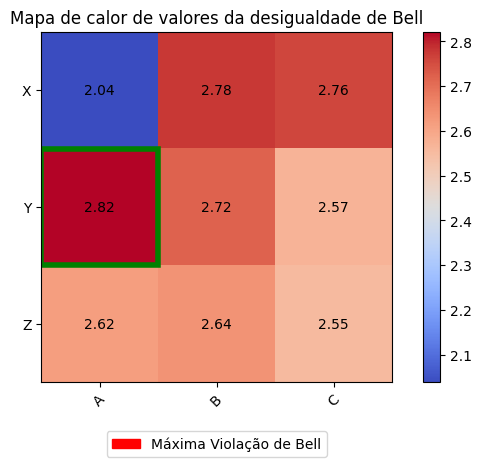

In [25]:
df = pd.DataFrame({
    'A': [Valores_S[0,0],Valores_S[1,0],Valores_S[2,0]],
    'B': [Valores_S[0,1],Valores_S[1,1],Valores_S[2,1]],
    'C': [Valores_S[0,2],Valores_S[1,2],Valores_S[2,2]]
},index = ['X', 'Y', 'Z'])

fig, ax = plt.subplots()
im = ax.imshow(df.values, cmap='coolwarm')

plt.colorbar(im)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

plt.xticks(rotation=45)

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        valor = f"{df.iloc[i, j]:.2f}"
        cor = "white" if df.iloc[i, j] < 0.5 else "black"
        ax.text(j, i, valor, ha="center", va="center", color=cor)


max_i, max_j = np.unravel_index(np.argmax(df.values), df.shape)
rect = plt.Rectangle((max_j - 0.5, max_i - 0.5), 1, 1, edgecolor='green', facecolor='none', linewidth=4)
ax.add_patch(rect)

Max_violacao = mpatches.Patch(color='red', label='Máxima Violação de Bell')
legenda = plt.legend(handles=[Max_violacao], loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=1)
plt.title("Mapa de calor de valores da desigualdade de Bell")
plt.tight_layout()
plt.show()

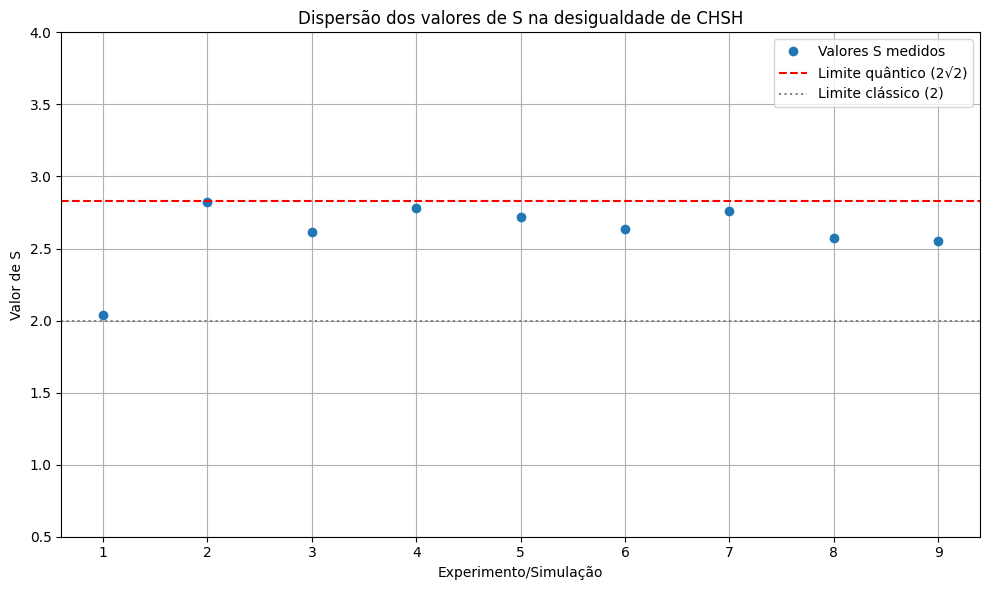

In [26]:
valores_S = [Valores_S[0,0],Valores_S[1,0],Valores_S[2,0],Valores_S[0,1],Valores_S[1,1],Valores_S[2,1],Valores_S[0,2],Valores_S[1,2],Valores_S[2,2]]
indices = list(range(1, len(valores_S)+1))

plt.figure(figsize=(10, 6))
plt.plot(indices, valores_S, marker='o', linestyle='', label='Valores S medidos')

plt.axhline(y=2*np.sqrt(2), color='red', linestyle='--', label='Limite quântico (2√2)')

plt.axhline(y=2, color='gray', linestyle=':', label='Limite clássico (2)')

plt.title('Dispersão dos valores de S na desigualdade de CHSH')
plt.xlabel('Experimento/Simulação')
plt.ylabel('Valor de S')
plt.ylim(0.5, 4)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Realização da Tomografia do Estado

#### Mapeamento 

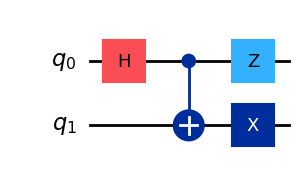

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(0)

qc.draw("mpl")

In [15]:
from qiskit_experiments.library.tomography import StateTomography
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.quantum_info import state_fidelity

#### Matriz densidade do estado ideal para o circuito 

In [17]:
qc_sv = Statevector.from_label('00').evolve(qc)
Estado_bell_ideal = DensityMatrix(qc)
print(Estado_bell_ideal)

DensityMatrix([[ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0.5+0.j, -0.5+0.j,  0. +0.j],
               [ 0. +0.j, -0.5+0.j,  0.5+0.j,  0. +0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j]],
              dims=(2, 2))


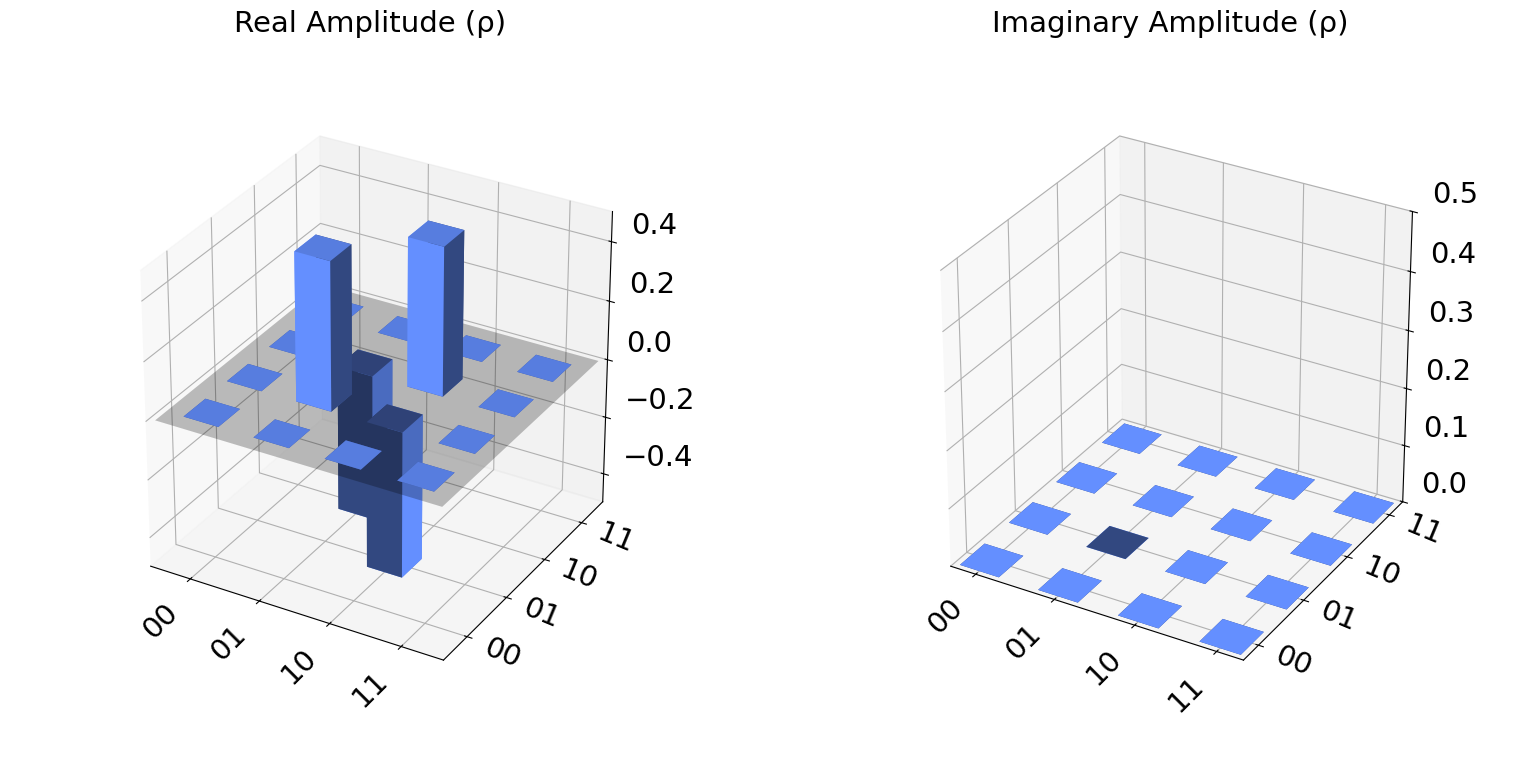

In [18]:
plot_state_city(Estado_bell_ideal)

In [ ]:
tomografia = StateTomography(qc)

simulator = AerSimulator()
result = tomografia.run(simulator, shots = 40000).block_for_results()
Estado_Bell_não_ideal = result.analysis_results("state").value
print(Estado_Bell_não_ideal.data)

[[ 5.93658717e-04+0.00000000e+00j -1.85789769e-03-4.77373827e-04j
   1.67983275e-03+1.46184090e-03j  3.18733075e-04+3.75165650e-04j]
 [-1.85789769e-03+4.77373827e-04j  4.99121583e-01+2.77555756e-17j
  -4.98618227e-01+2.83383751e-03j -1.16392310e-03-6.71356449e-04j]
 [ 1.67983275e-03-1.46184090e-03j -4.98618227e-01-2.83383751e-03j
   4.99876383e-01-2.77555756e-17j  1.69369099e-03+2.89774137e-05j]
 [ 3.18733075e-04-3.75165650e-04j -1.16392310e-03+6.71356449e-04j
   1.69369099e-03-2.89774137e-05j  4.08374736e-04+0.00000000e+00j]]


C:\Users\ianre\AppData\Local\Temp\ipykernel_8524\3527698743.py:5: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  Estado_Bell_não_ideal =result.analysis_results("state").value


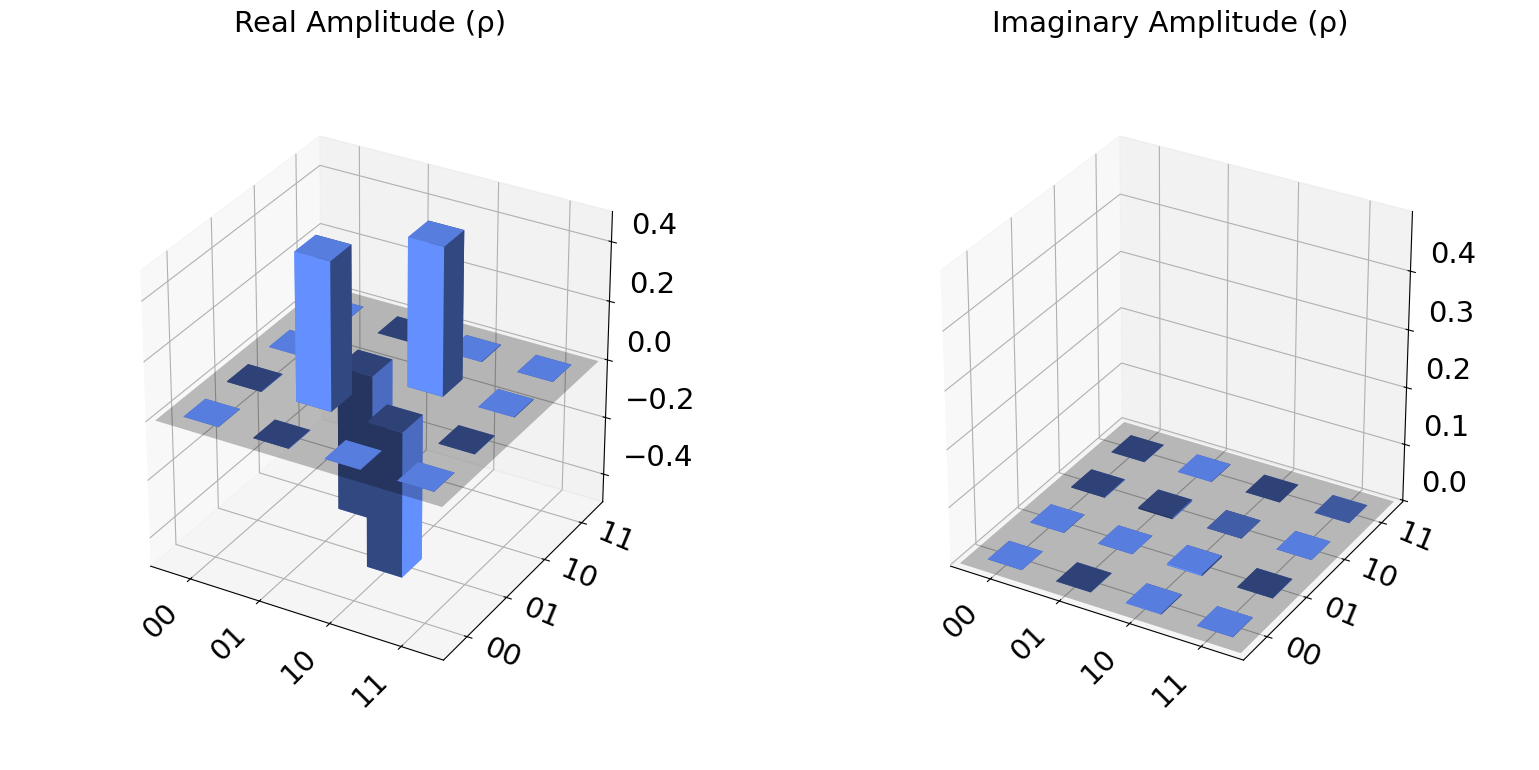

In [21]:
plot_state_city(Estado_Bell_não_ideal)

## Estado de Fidelidade

A fidelidade (ou "fidelity") entre dois estados quânticos é uma medida de quão "próximos" ou "semelhantes" eles são. 

$$
F(\rho, \sigma) = \Big( \mathrm{Tr} \big[\, \sqrt{\, \sqrt{\rho} \, \sigma \, \sqrt{\rho} }\, \big] \Big)^2
$$

In [25]:
fidelidade = state_fidelity(Estado_bell_ideal, Estado_Bell_não_ideal)
print(fidelidade)

0.9981172109199873
